$\underline{Runge-Kutta\hspace{0.2cm} 4^{th} \hspace{0.2cm}order}$

Some says this is the best method of numerical integration.

It's like second order RK, but it goes on with the step $\frac{\Delta t}{2}$.

We use the first derivative up to a point, from this point we take the derivative to another point, then to another and we take the average of those points.

$f(t + \Delta t/2) = f(t) + f'(f(t),t)\Delta /2$

$f'(t + \Delta t/2) = f(t) + f''(f(t + \Delta t/2),t + \Delta t/2)\Delta t/2$

$f(t + \Delta t) = f(t) + f''(f(t + \Delta t/2),t + \Delta t/2)\Delta t$

.

.

.

<$f$> $= 1/6[f'+2f''+2f'''+f'''']$

Weighted arithmetic mean = <$f$>

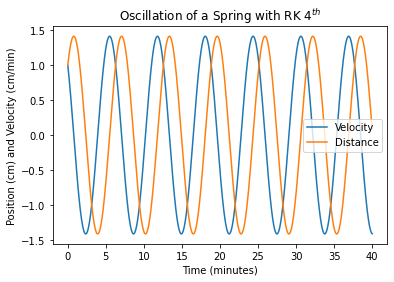

In [5]:
import numpy as np
import matplotlib.pyplot as plt

dt,t,tf = 0.0005,0,40 # Time interval, step in which time passes (interval between t1 and t2), initial time, final time, in minutes.
m = 1 # Spring mass.
k = m # Spring constant.   
w = np.sqrt(k/m) # k/m = w^2 = 1 Angular frequency. 
x1,v1 = 1,1 # Initial conditions of x0 and v0. 
x2,v2,vaux = 0,0,0
x3,v3 = 0,0 
v4,x4 = 0,0

# Lists:
list_t = [t]
list_x = [x1]
list_v = [v1]

def a(x):
  a = -(w**2) * x 
  return a 

xaux = x1
vaux = v1
while t < tf: 
  # RK4 method:
  x1 = xaux + vaux * dt/2 
  v1 = vaux + a(xaux) * dt/2 

  x2 = xaux + v1 * dt/2
  v2 = vaux + a(x1)*dt/2

  x3 = xaux + v2 * dt
  v3 = vaux + a(x2) * dt
  
  x4 = xaux + (vaux + 2 * v1 + 2 * v2 + v3) * dt/6
  v4 = vaux + (a(xaux) + 2* a(x1) + 2 * a(x2) + a(x3)) * dt/6

  list_x.append(x4)
  list_v.append(v4)

  vaux = v4 # The vaux and xaux are the ones we use in all calculations, it's the last point, x4 and v4 in this case (they are the average).
  xaux = x4 
  
  t = t + dt 
  list_t.append(t)


plt.plot(list_t,list_v)
plt.plot(list_t,list_x)
plt.title('Oscillation of a Spring with RK $4^{th}$')
plt.legend(['Velocity','Distance']) 
plt.xlabel('Time (minutes)')
plt.ylabel('Position (cm) and Velocity (cm/min)')
plt.show()